In [12]:
import pandas as pd
from sklearn.cluster import KMeans

# baca datasets
data = pd.read_csv('Mall_Customers.csv')

# ubah nama column
data = data.rename(columns={
    'Gender' : 'gender',
    'Age' : 'age',
    'Annual Income (k$)': 'annual_income',
    'Spending Score (1-100)': 'spending_score'
})

#ubah data kategori menjadi numerik (gender)
data['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

# menghilangkan column customerID dan gender
x = data.drop(['CustomerID', 'gender'], axis=1)

x.head(3)


,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6


Text(0, 0.5, 'Inertia')

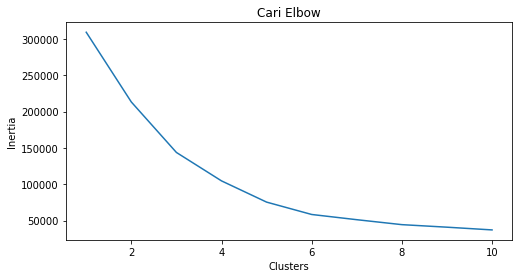

In [14]:
# membuat list yang berisi inertia
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(x)
    clusters.append(km.inertia_)
# tampilkan data yang sudah di preprocess
x.head(3)

import matplotlib.pyplot as plt
import seaborn as sns
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


C:\Users\Renol N\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


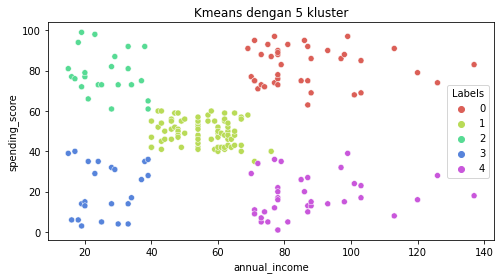

In [15]:
# Membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(x)

# menambah kolom label pada datasets
x['Labels'] = km5.labels_

# membuat plot dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x['annual_income'], x['spending_score'], hue=x['Labels'], palette=sns.color_palette('hls', 5))
plt.title('Kmeans dengan 5 kluster')
plt.show()

In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.decomposition import PCA

decision_tree = tree.DecisionTreeClassifier()

iris = datasets.load_iris()
atribut = iris.data
label = iris.target

# bagi data sets menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(atribut,label, test_size=0.2)

#test akurasi model
model_pertama = decision_tree.fit(x_train, y_train)
print('Akurasi : ', model_pertama.score(x_test, y_test))

# membuat objek PCA dengan 4 principal component
pca = PCA(n_components=4)

# mengaplikasikan PCA pada data sets yang sudah di train
pca_attributes = pca.fit_transform(x_train)

# melihat variance dari setiap atribut
pca.explained_variance_ratio_

# pca dengan 2 principal component
pca2 = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

# uji akurasi classifier
model2 = decision_tree.fit(x_train_pca, y_train)
print('Akurasi PCA : ', model2.score(x_test_pca, y_test))

Akurasi :  0.9333333333333333
Akurasi PCA :  0.9333333333333333
